# Análise Exploratória de Dados
Este notebook tem por objetivo introduzir conceitos e códigos simples sobre EDA, a sigla vem do inglês e remete à Exploratory Data Analysis. Este procedimento é a primeira atividade realizada por um cientista de dados ao se deparar com uma nova base de dados(dataset), ele serve basicamente para prover um entendimento estruturado desses novos dados. Isso gera insights e facilita na determinação de estratégias para modelagem.

Usamos os dados do dataset obtido do Kaggle:
https://www.kaggle.com/datasets/prasertk/netflix-daily-top-10-in-us?select=netflix+daily+top+10.csv

Que usou como base:
https://www.the-numbers.com/netflix-top-10

O dataset utilizado refere-se à títulos da Netflix que ficaram no top 10 a cada dia, informações mais detalhadas podem ser encontradas nos links acima.

In [1]:
# Importando bibliotecas necessárias
import pandas as pd
import datetime as dt

In [2]:
# Lendo o dataset e atribuindo à variável base
base = pd.read_csv("netflix daily top 10.csv")

#### Visualizar a base que importamos

O método head mostra as 5 primeiras linhas do dataset, entretando pode-se passar como parâmetro um número de linhas específicas que você queira visualizar.

In [3]:
base.head()

,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score
0,2020-04-01,1,1,1,"Tiger King: Murder, Mayhem …",TV Show,Yes,"Mar 20, 2020",9,90
1,2020-04-01,2,2,-,Ozark,TV Show,Yes,"Jul 21, 2017",5,45
2,2020-04-01,3,3,2,All American,TV Show,NaN,"Mar 28, 2019",9,76
3,2020-04-01,4,4,-,Blood Father,Movie,NaN,"Mar 26, 2020",5,30
4,2020-04-01,5,5,4,The Platform,Movie,Yes,"Mar 20, 2020",9,55


Semelhante ao método head o pandas possui o método tail e mostra as 5 últimas linhas do dataset por default e também pode receber um número de linhas específico como parâmetro.


In [4]:
base.tail()

,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score
7095,2022-03-11,6,5,1,Worst Roommate Ever,TV Show,Yes,"Mar 1, 2022",10,81
7096,2022-03-11,7,7,2,Vikings: Valhalla,TV Show,Yes,"Feb 25, 2022",14,100
7097,2022-03-11,8,8,-,Shooter,Movie,NaN,"Aug 1, 2014",3,7
7098,2022-03-11,9,9,7,Shrek 2,Movie,NaN,"Mar 1, 2022",10,33
7099,2022-03-11,10,10,-,Shrek,Movie,NaN,"May 1, 2018",7,12


#### Saber o tamanho da base

O método shape retorna o número de linhas e colúnas do dataset.

In [5]:
base.shape

(7100, 10)

#### Visualizar a base que importamos e o tamanho da base

Semelhante aos métodos head e tail, a função display mostra as 5 primeiras e também as 5 últimas linhas do dataset, além disso informa logo abaixo a dimensão do dataset.

In [6]:
display(base)

,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score
0,2020-04-01,1,1,1,"Tiger King: Murder, Mayhem …",TV Show,Yes,"Mar 20, 2020",9,90
1,2020-04-01,2,2,-,Ozark,TV Show,Yes,"Jul 21, 2017",5,45
2,2020-04-01,3,3,2,All American,TV Show,NaN,"Mar 28, 2019",9,76
3,2020-04-01,4,4,-,Blood Father,Movie,NaN,"Mar 26, 2020",5,30
4,2020-04-01,5,5,4,The Platform,Movie,Yes,"Mar 20, 2020",9,55
...,...,...,...,...,...,...,...,...,...,...
7095,2022-03-11,6,5,1,Worst Roommate Ever,TV Show,Yes,"Mar 1, 2022",10,81
7096,2022-03-11,7,7,2,Vikings: Valhalla,TV Show,Yes,"Feb 25, 2022",14,100
7097,2022-03-11,8,8,-,Shooter,Movie,NaN,"Aug 1, 2014",3,7
7098,2022-03-11,9,9,7,Shrek 2,Movie,NaN,"Mar 1, 2022",10,33


#### Descobrindo o período da análise

A coluna "As of" informa as datas de apuração, logo pegagando seus valores máximos e mínimos conseguimos definir o período total da análise.

In [7]:
# Transformando coluna 'As of' para o tipo datetime e pegando seu valor mínimo
inicio = pd.to_datetime(base['As of']).dt.date.min()
print(inicio)

2020-04-01


In [8]:
# Transformando coluna 'As of' para o tipo datetime e pegando seu valor máximo
fim = pd.to_datetime(base['As of']).dt.date.max()
print(fim)

2022-03-11


#### Verificar valores nulos e tipo de dados

o método info informa o número de linhas não nulas de cada coluna, o tipo de dado de cada coluna, o intervalo de índices do dataset e a quantidade de memória utilizada para armazenamento da base de dados.

In [11]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7100 entries, 0 to 7099
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   As of                 7100 non-null   object
 1   Rank                  7100 non-null   int64 
 2   Year to Date Rank     7100 non-null   object
 3   Last Week Rank        7100 non-null   object
 4   Title                 7100 non-null   object
 5   Type                  7100 non-null   object
 6   Netflix Exclusive     4599 non-null   object
 7   Netflix Release Date  7100 non-null   object
 8   Days In Top 10        7100 non-null   int64 
 9   Viewership Score      7100 non-null   int64 
dtypes: int64(3), object(7)
memory usage: 554.8+ KB


#### Verificando o tipo dos dados

O método dtypes informa apenas o tipo de dado de cada coluna do dataset.

In [12]:
base.dtypes

As of                   object
Rank                     int64
Year to Date Rank       object
Last Week Rank          object
Title                   object
Type                    object
Netflix Exclusive       object
Netflix Release Date    object
Days In Top 10           int64
Viewership Score         int64
dtype: object

#### Verificando a existência de valores nulos

Aplicando os métodos isnull e sum sequencialmente como no código abaixo podemos verificar a quantidade de valores nulos por coluna.

In [13]:
base.isnull().sum()

As of                      0
Rank                       0
Year to Date Rank          0
Last Week Rank             0
Title                      0
Type                       0
Netflix Exclusive       2501
Netflix Release Date       0
Days In Top 10             0
Viewership Score           0
dtype: int64

#### Entendendo melhor os valores nulos

Com o código abaixo podemos visualizar a quantidade total de cada valor único em uma coluna, observe que na coluna "Netflix Exclusive" há apenas o valor "yes", ou seja, os dados nulos neste caso estão representado a não exclusividade.

In [14]:
base['Netflix Exclusive'].value_counts()

Yes    4599
Name: Netflix Exclusive, dtype: int64

#### Analisando as informações estatísticas

O método describe é util para entender alguns dados estatísticos básicos sobre o dataset, ele informa valores totais, média, desvio padrão, quartis e valores máximos e mínimos. Observe que o método logicamente só mostra dados das colunas com valores numéricos.

In [15]:
base.describe()

,Rank,Days In Top 10,Viewership Score
count,7100.000000,7100.000000,7100.000000
mean,5.500000,24.123662,122.790141
std,2.872484,58.473789,213.861642
min,1.000000,1.000000,1.000000
25%,3.000000,3.000000,19.000000
50%,5.500000,7.000000,50.000000
75%,8.000000,18.000000,128.000000
max,10.000000,428.000000,1474.000000


#### Entendendo melhor essas informações

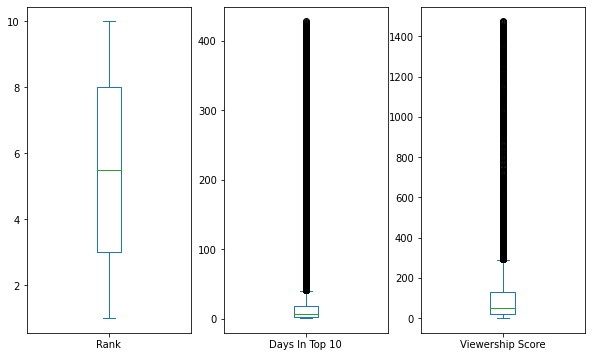

In [16]:
base.plot(kind='box',figsize=(10,6),subplots=True); 

##### O que seriam esses outliers?

In [10]:
base[base['Days In Top 10'] >= 100]

,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score
2886,2021-01-14,7,6,8,Cocomelon,TV Show,NaN,"Jun 1, 2020",100,287
2896,2021-01-15,7,7,10,Cocomelon,TV Show,NaN,"Jun 1, 2020",101,291
2909,2021-01-16,10,7,9,Cocomelon,TV Show,NaN,"Jun 1, 2020",102,292
2919,2021-01-17,10,10,9,Cocomelon,TV Show,NaN,"Jun 1, 2020",103,293
3019,2021-01-27,10,-,-,Cocomelon,TV Show,NaN,"Jun 1, 2020",104,294
...,...,...,...,...,...,...,...,...,...,...
6674,2022-01-28,5,6,-,Cocomelon,TV Show,NaN,"Jun 1, 2020",424,1466
6687,2022-01-29,8,5,8,Cocomelon,TV Show,NaN,"Jun 1, 2020",425,1469
6718,2022-02-01,9,-,7,Cocomelon,TV Show,NaN,"Jun 1, 2020",426,1471
6959,2022-02-25,10,-,-,Cocomelon,TV Show,NaN,"Jun 1, 2020",427,1472


In [ ]:
# É possível exportar um arquivo excel de parte dao dataset 
base_excel = base[base['Days In Top 10'] >= 100]
base_excel.to_excel('Verificar.xlsx')

#### Entendendo melhor essas informações (continuando)

Com o código abaixo é possível verificar a quantidade total de aparições de cada título. Nesse caso o título "Cocomelon" apareceu mais vezes no top 10 da Netflix

In [ ]:
base.Title.value_counts()

Cocomelon                       428
Ozark                            85
Cobra Kai                        81
Manifest                         80
The Queenâs Gambit             73
                               ... 
The Office                        1
Animals on the Loose: A You…      1
Dark                              1
The Secret Life of Pets 2         1
Step Up Revolution                1
Name: Title, Length: 645, dtype: int64

Podemos plotar um gráfico de barras para entender a distribuição dos títulos por categoria ( Série, filme, seriado, etc..) como no código abaixo.

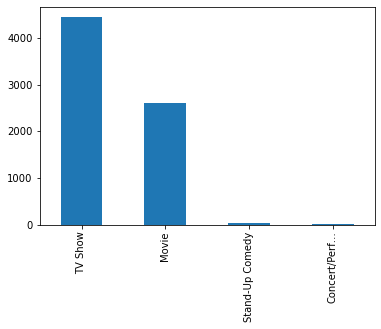

In [ ]:
base.Type.value_counts().plot(kind='bar');

Para entender melhor a coluna "Viewership Score" podemos plotar um histograma como é mostrado abaixo, nele são informados os scores no eixo horizontal e os índices do dataset no eixo vertical. Note que a maioria dos títulos se concentra entre os scores 0 e 300

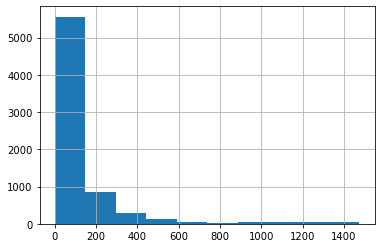

In [ ]:
base['Viewership Score'].hist();

Podemos utilizar o pandas para localizar elementos do dataset que cumprem uma sentença lógica, no exemplo abaixo procuramos pelo título do dataset que possuia maior score.

In [ ]:
base[base['Viewership Score'] == base['Viewership Score'].max()]

,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score
6998,2022-03-01,9,-,-,Cocomelon,TV Show,NaN,"Jun 1, 2020",428,1474
